#https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6

In [6]:
import numpy
## the genetic algorithm class/module
class GA:
    def __init__(self):
        print("ga class created")
    
    def cal_pop_fitness(self, equation_inputs, pop):
        # Calculating the fitness value of each solution in the current population.
        # The fitness function caulcuates the sum of products between each input and its corresponding weight.
        fitness = numpy.sum(pop*equation_inputs, axis=1)
        return fitness

    def select_mating_pool(self, pop, fitness, num_parents):
        # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
        parents = numpy.empty((num_parents, pop.shape[1]))
        for parent_num in range(num_parents):
            max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
            max_fitness_idx = max_fitness_idx[0][0]
            parents[parent_num, :] = pop[max_fitness_idx, :]
            fitness[max_fitness_idx] = -99999999999
        return parents

    def crossover(self, parents, offspring_size):
        offspring = numpy.empty(offspring_size)
        # The point at which crossover takes place between two parents. Usually it is at the center.
        crossover_point = numpy.uint8(offspring_size[1]/2)

        for k in range(offspring_size[0]):
            # Index of the first parent to mate.
            parent1_idx = k%parents.shape[0]
            # Index of the second parent to mate.
            parent2_idx = (k+1)%parents.shape[0]
            # The new offspring will have its first half of its genes taken from the first parent.
            offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
            # The new offspring will have its second half of its genes taken from the second parent.
            offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
        return offspring

    def mutation(self, offspring_crossover):
        # Mutation changes a single gene in each offspring randomly.
        for idx in range(offspring_crossover.shape[0]):
            # The random value to be added to the gene.
            random_value = numpy.random.uniform(-1.0, 1.0, 1)
            offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
        return offspring_crossover

In [12]:
ga = GA()
"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = 6

"""
Genetic algorithm parameters:
    Population size
    Mating pool size
"""
sol_per_pop = 8
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)


ga class created


[[-3.42084815  0.82582149  0.72021219 -1.49554943 -3.28894404  2.37538899]
 [ 3.17912141 -2.03068729  0.58634127 -2.47124338  3.49091969 -2.67815686]
 [ 2.38630646  0.42416283 -3.48294932 -1.92093663 -0.51308122 -3.08476712]
 [ 0.26250282 -1.03527999 -3.42632802 -1.43152785  2.72916814 -0.73675479]
 [ 3.35128853  1.93322249  3.14891295 -2.82655698 -1.50803062  3.18115314]
 [-0.01421596  2.09400142  3.40478304 -0.59461874  2.83979897 -3.59678567]
 [ 0.61256596 -0.77029291  3.39706386  2.95062135 -0.91291338  2.66299036]
 [-2.86134965  0.57684788 -1.91659947  0.05526675  0.05462497 -3.50253445]]
Generation :  0
fitness [  4.72201619 -19.33894155   7.04419327 -42.5873181    8.06403667
  -9.63411578  28.15967245  -3.16982153]
parents
 [[ 0.61256596 -0.77029291  3.39706386  2.95062135 -0.91291338  2.66299036]
 [ 3.35128853  1.93322249  3.14891295 -2.82655698 -1.50803062  3.18115314]
 [ 2.38630646  0.42416283 -3.48294932 -1.92093663 -0.51308122 -3.08476712]
 [-3.42084815  0.82582149  0.72021

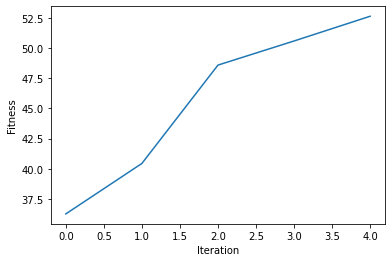

In [13]:
best_outputs = []
num_generations = 5
for generation in range(num_generations):
    print(new_population)
    print("Generation : ", generation)
    # Measing the fitness of each chromosome in the population.
    fitness = ga.cal_pop_fitness(equation_inputs, new_population)
    print("fitness",fitness)

    # Selecting the best parents in the population for mating.
    parents = ga.select_mating_pool(new_population, fitness, num_parents_mating)
    print("parents\n",parents)

    # Generating next generation using crossover.
    offspring_crossover = ga.crossover(parents, offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("offspring_crossover\n",offspring_crossover)

    # Adding some variations to the offsrping using mutation.
    offspring_mutation = ga.mutation(offspring_crossover)
    print("offspring_mutation\n",offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    print("parents.shape[0] ",parents.shape[0])
    print("new_population 1st half\n",new_population)
    new_population[parents.shape[0]:, :] = offspring_mutation
    print("new_population all\n",new_population)

    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = ga.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

#https://github.com/ahmedfgad/GeneticAlgorithmPython/blob/master/Tutorial%20Project/Example_GeneticAlgorithm.py

In [1]:
!pip install pygad

In [ ]:
import pygad
import numpy

function_inputs = [4,-2,3.5,5,-11,-4.7]
desired_output = 44

def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

fitness_function = fitness_func

def on_start(ga_instance):
    print("on_start()")

def on_fitness(ga_instance, population_fitness):
    print("on_fitness()")

def on_parents(ga_instance, selected_parents):
    print("on_parents()")

def on_crossover(ga_instance, offspring_crossover):
    print("on_crossover()")

def on_mutation(ga_instance, offspring_mutation):
    print("on_mutation()")

def on_generation(ga_instance):
    print("on_generation()")

def on_stop(ga_instance, last_population_fitness):
    print("on_stop()")

ga_instance = pygad.GA(num_generations=3,
                       num_parents_mating=5,
                       fitness_func=fitness_function,
                       sol_per_pop=10,
                       num_genes=len(function_inputs),
                       on_start=on_start,
                       on_fitness=on_fitness,
                       on_parents=on_parents,
                       on_crossover=on_crossover,
                       on_mutation=on_mutation,
                       on_generation=on_generation,
                       on_stop=on_stop)

ga_instance.run()

In [ ]:
import pygad
import numpy

"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(solution, solution_idx):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

num_generations = 100 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 50 # Number of solutions in the population.
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss" # Type of parent selection.
keep_parents = 7 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

crossover_type = "single_point" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists or when mutation_type is None.

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       callback_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_result()
